In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df1=pd.read_csv(r"C:\Users\govin\Dropbox\My PC (LAPTOP-5T690CDI)\Downloads\ML case Study - ML case Study.csv",header=0)
df2=pd.read_csv(r"C:\Users\govin\Dropbox\My PC (LAPTOP-5T690CDI)\Downloads\Colleges - Colleges.csv",header=0)
df3=pd.read_csv(r'C:\Users\govin\Dropbox\My PC (LAPTOP-5T690CDI)\Downloads\cities - cities.csv',header=0)

In [57]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [58]:
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [59]:
df3.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


Data Tidying

In [60]:
df21=pd.melt(df2,var_name='Tier',value_name='College')
df21.head()

,Tier,College
0,Tier 1,IIT Bombay
1,Tier 1,IIT Delhi
2,Tier 1,IIT Kharagpur
3,Tier 1,IIT Madras
4,Tier 1,IIT Kanpur


In [61]:
df=pd.merge(df1,df21,on='College',how='left')
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,Tier 3
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,Tier 1


In [62]:
df31=pd.melt(df3,var_name="city_type",value_name='City')
df31.head()

,city_type,City
0,Metrio City,Mumbai
1,Metrio City,Delhi
2,Metrio City,Kolkata
3,Metrio City,Chennai
4,Metrio City,Bangalore


In [63]:
df_main=pd.merge(df,df31,on="City",how='left')
df_main.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,city_type
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,Tier 2,non-metro cities
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,Tier 2,non-metro cities
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,Tier 3,non-metro cities
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,Tier 3,non-metro cities
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,Tier 1,non-metro cities


Data Preprocessing

In [64]:
df_main.isnull().any()

College                False
City                   False
Role                   False
Previous CTC           False
Previous job change    False
Graduation Marks       False
EXP (Month)            False
CTC                    False
Tier                   False
city_type              False
dtype: bool

In [65]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   Tier                 1589 non-null   object 
 9   city_type            1589 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 124.3+ KB


In [66]:
df_main.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


Converting Categorical Variables

In [67]:
df_main['Tier']=df_main['Tier'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [68]:
df_main.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,city_type
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,2,non-metro cities
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,2,non-metro cities
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,3,non-metro cities
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,3,non-metro cities
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,1,non-metro cities


In [69]:
df_main['city_type']=df_main['city_type'].map({'non-metro cities':0, 'Metrio City': 1})

In [70]:
df_main.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,city_type
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,2,0
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,2,0
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,3,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,3,0
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,1,0


In [71]:
df_1=pd.get_dummies(df_main,columns=['Role'],drop_first=True,dtype=int)


Outliers Analysis

<Axes: >

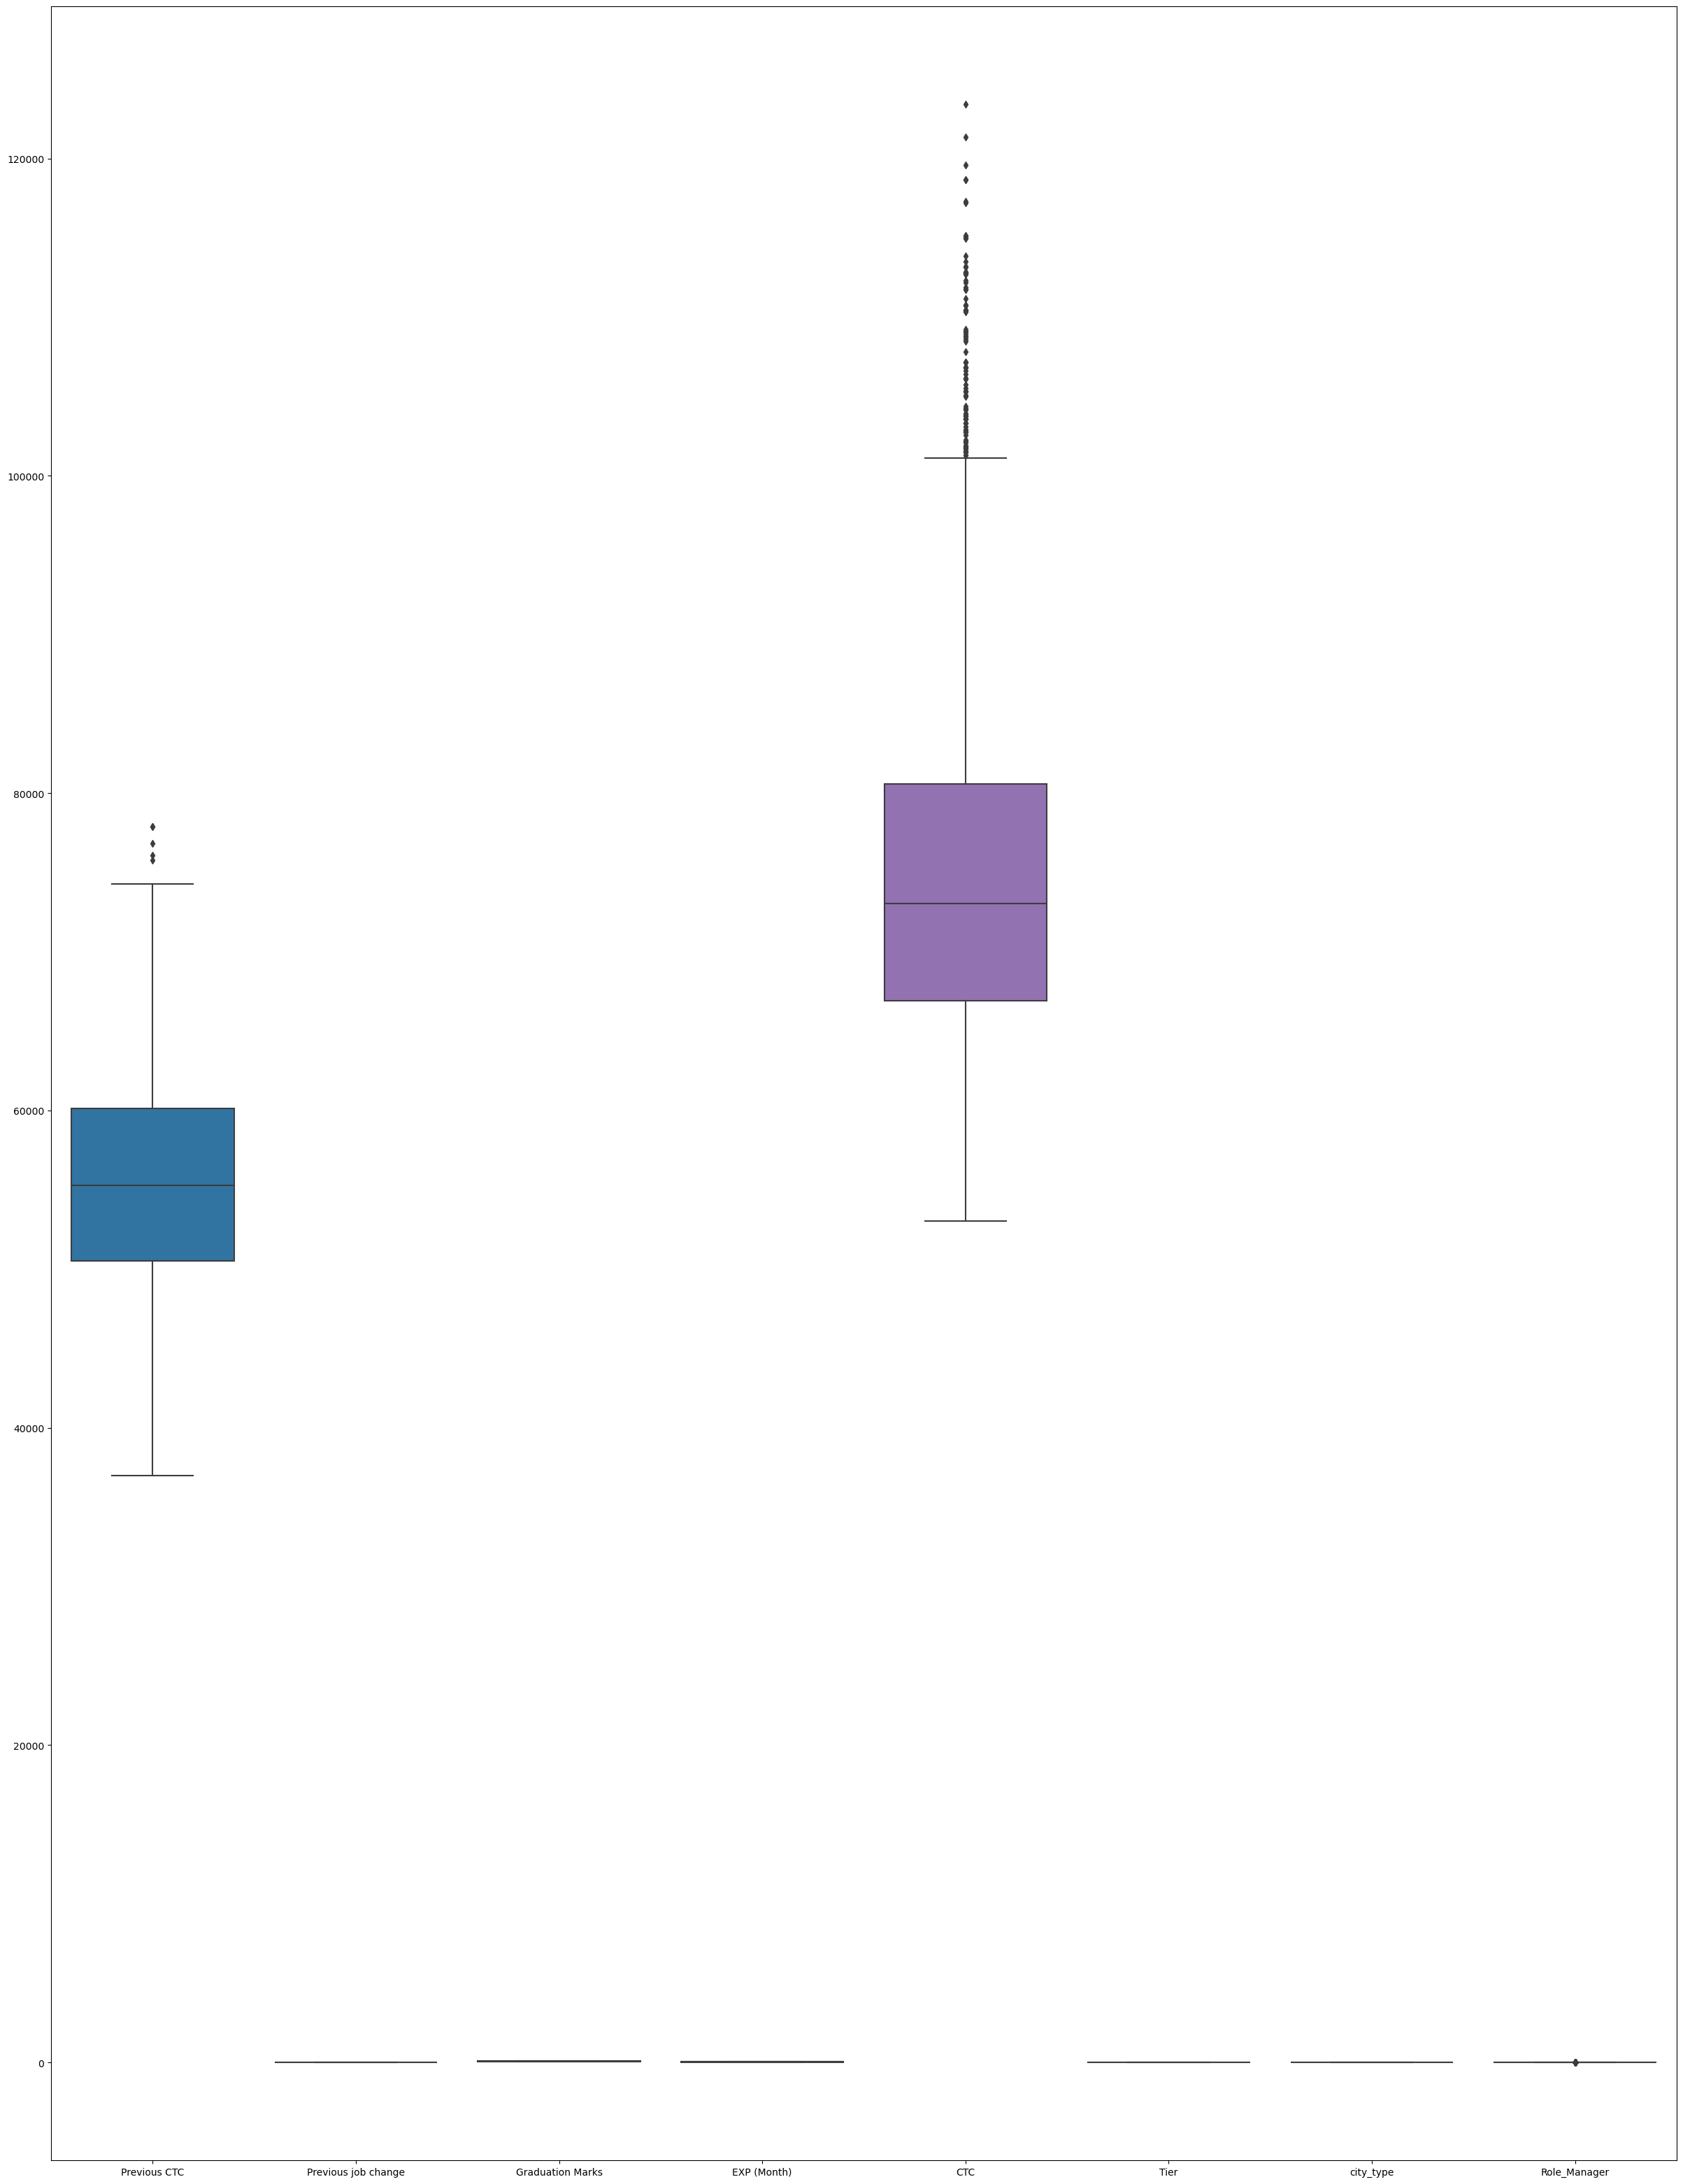

In [72]:
plt.figure(figsize=(30,40))
sns.boxplot(data=df_1)

In [73]:
df_1.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,city_type,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,1.975456,0.514160,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.838330,0.499957,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,1.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,2.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,3.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,3.000000,1.000000,1.000000


In [74]:
df_1.corr

<bound method DataFrame.corr of                           College             City  Previous CTC  \
0                     SVNIT Surat          Asansol         55523   
1                      NIT Bhopal            Ajmer         57081   
2                    IEM, Kolkata  Rajpur Sonarpur         60347   
3               KIIT, Bhubaneswar            Ajmer         49010   
4                             DTU         Durgapur         57879   
...                           ...              ...           ...   
1584     BITS Pilani (Goa Campus)            Surat         61285   
1585                 NIT Warangal  Rajpur Sonarpur         63140   
1586    NIT Tiruchipally (Trichy)        Ahmedabad         44907   
1587               IIIT Hyderabad         Durgapur         52054   
1588  R.V. College of Engineering            Delhi         44353   

      Previous job change  Graduation Marks  EXP (Month)       CTC  Tier  \
0                       3                66           19  71406.58     2   

In [75]:
# Define columns for capping and flooring
outlier_columns = ['Previous CTC', 'Graduation Marks']

# Applying capping and flooring based on IQR
for col in outlier_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)

In [76]:
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply flooring and capping
    df_1[col] = np.where(df_1[col] < lower_bound, lower_bound, df_1[col])
    df_1[col] = np.where(df_1[col] > upper_bound, upper_bound, df_1[col])

In [77]:
df_1[outlier_columns].describe()

,Previous CTC,Graduation Marks
count,1589.000000,1589.000000
mean,55518.453744,59.855255
std,6655.218445,14.935139
min,36990.000000,35.000000
25%,50518.000000,46.000000
50%,55291.000000,60.000000
75%,60109.000000,73.000000
max,77911.000000,85.000000


<Axes: >

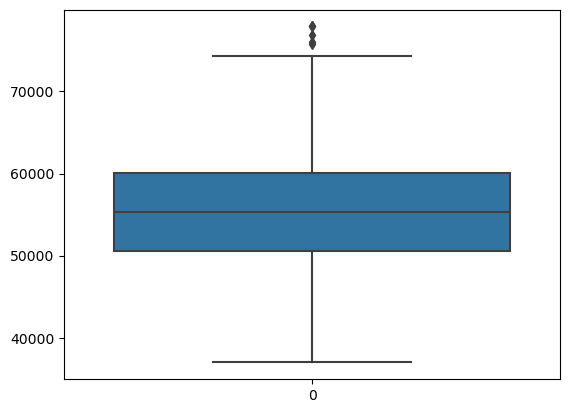

In [78]:
sns.boxplot(data=df_1['Previous CTC'])

<Axes: xlabel='Previous CTC', ylabel='CTC'>

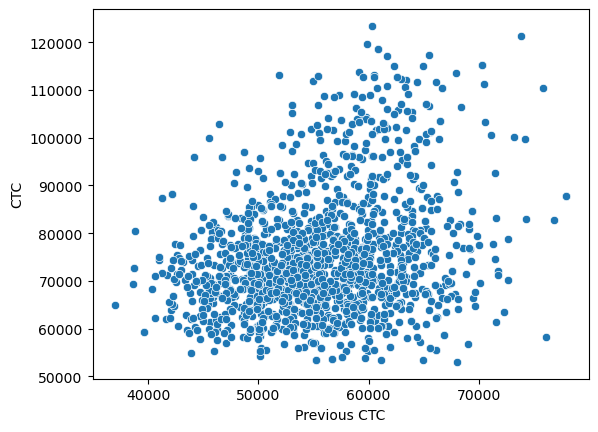

In [79]:
sns.scatterplot(x=df['Previous CTC'],y=df['CTC'])

In [80]:
df_1=df_1.drop(columns=['College','City'],axis=1)

In [81]:
df_1.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,city_type,Role_Manager
0,55523,3,66.0,19,71406.58,2,0,1
1,57081,1,84.0,18,68005.87,2,0,0
2,60347,2,52.0,28,76764.02,3,0,0
3,49010,2,81.0,33,82092.39,3,0,0
4,57879,4,74.0,32,73878.10,1,0,0


C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\govin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

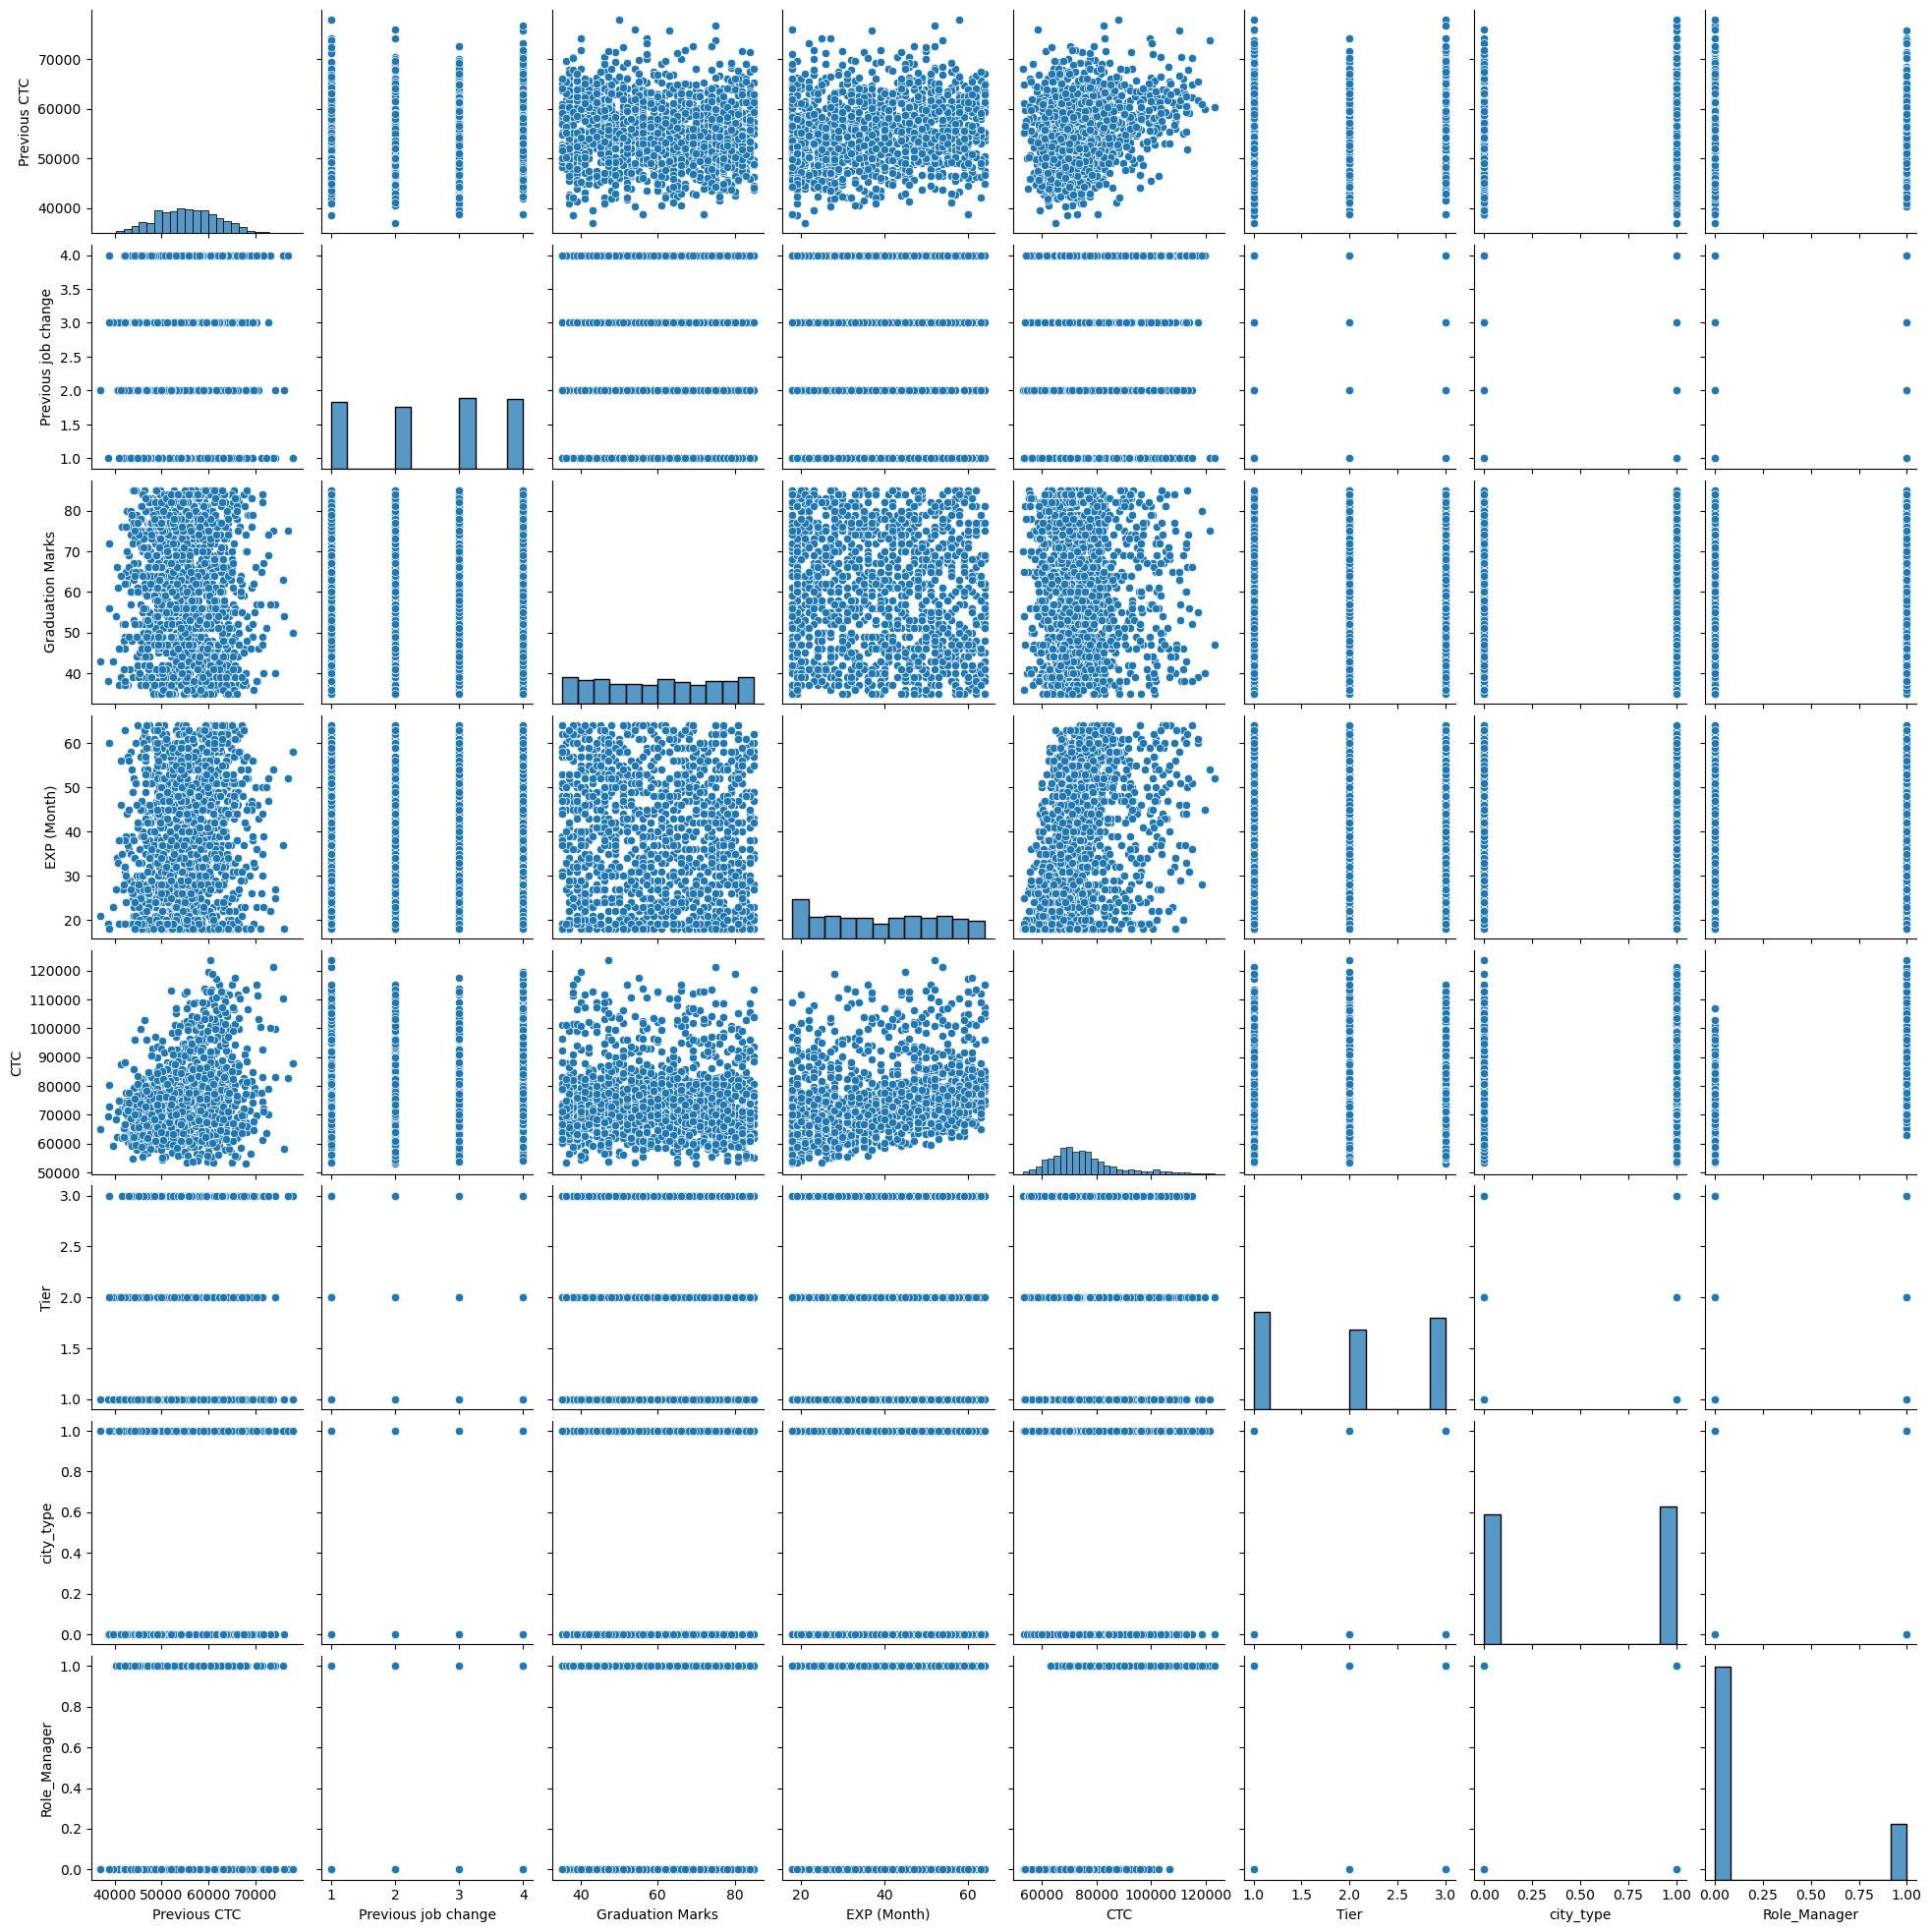

In [82]:
sns.pairplot(df_1)

TRAIN_TEST_SPLIT DATA

In [83]:
from sklearn.model_selection import train_test_split
x=df_1.drop('CTC',axis=1)
y=df_1['CTC']

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [85]:
x_train.shape

(1271, 7)

Model Selection- Linear regression

In [86]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [87]:
from sklearn.metrics import r2_score,mean_squared_error

In [88]:
r2_score(y_test,lm.predict(x_test))

0.5355989894789344

In [89]:
mean_squared_error(y_test,lm.predict(x_test))

68909870.6995367

Rigde REGRESSION

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
from sklearn.linear_model import Ridge, Lasso

In [92]:
ridge=Ridge(alpha=0.4)
ridge.fit(x_train,y_train)

Ridge(alpha=0.4)

In [93]:
mean_squared_error(y_test,ridge.predict(x_test))

68923681.19195196

In [94]:
r2_score(y_test,ridge.predict(x_test))

0.5355059170849749

Lasso

In [95]:
lasso=Lasso(alpha=1.0)
lasso.fit(x_train,y_train)

Lasso()

In [96]:
mean_squared_error(y_test,lasso.predict(x_test))

68908039.75909664

In [97]:
r2_score(y_test,lasso.predict(x_test))

0.5356113286486635

Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [99]:
regtree=DecisionTreeRegressor(max_depth=4,random_state=42)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [100]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

In [101]:
mean_squared_error(y_test,regtree.predict(x_test))

58875901.69009934

In [102]:
r2_score(y_test,regtree.predict(x_test))

0.603220439065417

[Text(0.5, 0.9, 'Role_Manager <= 0.5\nsquared_error = 160828908.586\nsamples = 1271\nvalue = 75332.826'),
 Text(0.25, 0.7, 'EXP (Month) <= 43.5\nsquared_error = 72661228.522\nsamples = 1007\nvalue = 71337.154'),
 Text(0.125, 0.5, 'EXP (Month) <= 32.5\nsquared_error = 55243165.67\nsamples = 589\nvalue = 68256.824'),
 Text(0.0625, 0.3, 'Previous CTC <= 62803.0\nsquared_error = 59283200.663\nsamples = 365\nvalue = 67137.922'),
 Text(0.03125, 0.1, 'squared_error = 50748134.373\nsamples = 329\nvalue = 66709.395'),
 Text(0.09375, 0.1, 'squared_error = 120268898.169\nsamples = 36\nvalue = 71054.184'),
 Text(0.1875, 0.3, 'Previous job change <= 2.5\nsquared_error = 43295987.166\nsamples = 224\nvalue = 70080.034'),
 Text(0.15625, 0.1, 'squared_error = 38141211.891\nsamples = 121\nvalue = 68706.522'),
 Text(0.21875, 0.1, 'squared_error = 44531860.301\nsamples = 103\nvalue = 71693.576'),
 Text(0.375, 0.5, 'EXP (Month) <= 51.5\nsquared_error = 64995149.814\nsamples = 418\nvalue = 75677.62'),
 Text

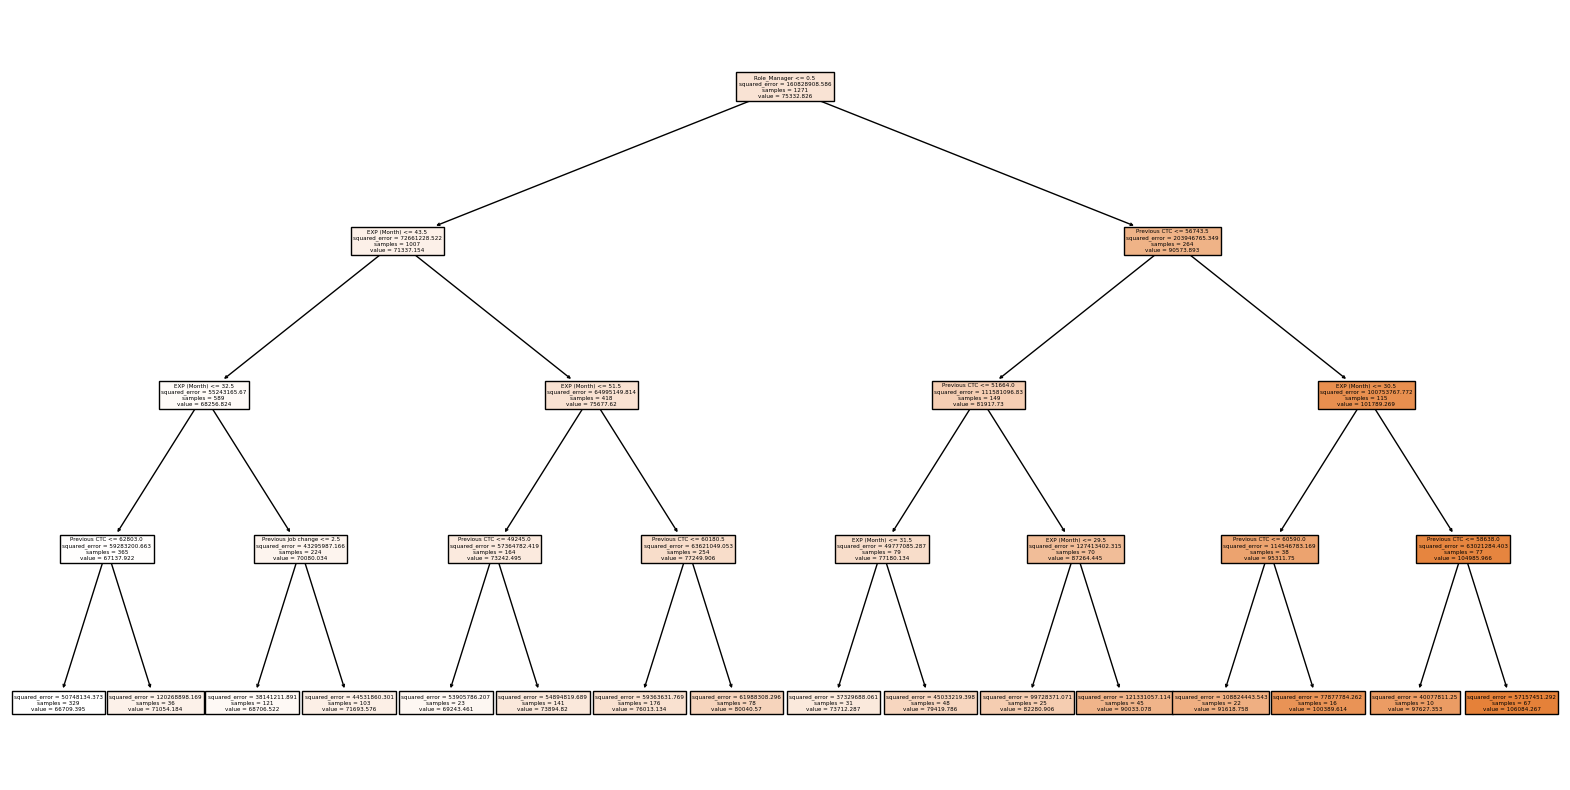

In [103]:
plt.figure(figsize=(20,10))
plot_tree(regtree,feature_names=x.columns,filled=True)

Random Forest regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rf_reg=RandomForestRegressor(n_estimators=250,random_state=42)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [106]:
mean_squared_error(y_test,rf_reg.predict(x_test))

50252512.747125365

In [107]:
r2_score(y_test,rf_reg.predict(x_test))

0.6613356335735419

GradientBoosting

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

In [109]:
gb_reg=GradientBoostingRegressor(learning_rate=0.02,n_estimators=1000)
gb_reg.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000)

In [110]:
r2_score(y_test,gb_reg.predict(x_test))

0.6151544712551267

XG BOOSTING

In [111]:
import xgboost as xgb

In [112]:
xgb_reg=xgb.XGBRegressor(max_depth=4,n_estimators=1000,learning_rate=0.02,n_jobs=-1)
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [113]:
r2_score(y_test,xgb_reg.predict(x_test))

0.6116294596439038

In [114]:
mean_squared_error(y_test,xgb_reg.predict(x_test))

57628134.11930294